In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Crashes_in_DC.csv')
df

C:\Users\cle9a\AppData\Local\Temp\ipykernel_17676\2397942776.py:1: DtypeWarning: Columns (3,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Crashes_in_DC.csv')


,X,Y,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,ROADWAYSEGID,...,MAR_ID,BLOCKKEY,SUBBLOCKKEY,CORRIDORID,NEARESTINTKEY,MAJORINJURIESOTHER,MINORINJURIESOTHER,UNKNOWNINJURIESOTHER,FATALOTHER,OBJECTID
0,-8.570973e+06,4.714620e+06,23550481,10185907,2010/12/29 02:55:00+00,12081442,4999.11,24.34,444.0,19193.0,...,13538,d0ed1b16175a272ae7f1142655614d7a,d0ed1b16175a272ae7f1142655614d7a,12081442_1,885cf46b93d3ccee8f3c51b08822491a,NaN,NaN,NaN,NaN,398429706
1,-8.575714e+06,4.707720e+06,23553086,10186639,2010/12/30 18:30:00+00,11050892,2416.55,12.94,-9.0,21676.0,...,299579,f7578713f771d715089b9752ae2142cb,8127a1c6737ab04c44bac1414ad10788,13061162_1,eb9ec54c8003b9120b27bb44d03baf01,NaN,NaN,NaN,NaN,398429707
2,-8.569719e+06,4.713447e+06,23553677,10186645,2010/12/30 18:50:00+00,12060582,2964.14,0.00,10503.0,7890.0,...,60550,32b260c5747adf0393fbb2a2da41b3eb,32b260c5747adf0393fbb2a2da41b3eb,12060582_1,0a5da39c8be6fcf3475e9b03e014c968,NaN,NaN,NaN,NaN,398429708
3,-8.573989e+06,4.711847e+06,23555206,11000000,2011/02/24 00:30:00+00,11000602,3549.01,37.69,-9.0,24422.0,...,285299,5bfdfd2a893223a1aa9c3563d6b89a4e,5bfdfd2a893223a1aa9c3563d6b89a4e,Blockkey Not Found on Corridor,de2b4349f39cf3accc9457e26292782c,NaN,NaN,NaN,NaN,398452397
4,-8.574611e+06,4.709185e+06,23559893,11002587,2011/01/06 05:00:00+00,11001102,2001.90,0.01,9466.0,10207.0,...,239055,08f916dd45bceb2c385468d5395058f6,693f3b3b1494deea08f4305e90c5d0c5,11094052_1,33b397b437352dd32886bc9ca2ebd161,NaN,NaN,NaN,NaN,398452398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338351,-8.575294e+06,4.712152e+06,66809241168,25159724,2025/10/20 16:40:00+00,11060452,200.16,18.78,NaN,NaN,...,234609,5b252602d95d71962caff181c992f530,e73c358540010471c936ab0c634861e1,NaN,dc0a011769c5a6816dd712bebbde1faa,0.0,0.0,0.0,0.0,398790745
338352,-8.567929e+06,4.702735e+06,66811356319,25158441,2025/10/18 00:00:00+00,13085542,176.38,20.59,NaN,NaN,...,148093,ab7aca869b9a9f0dc42a25c4209bc21a,ab7aca869b9a9f0dc42a25c4209bc21a,13085542_1,0b271fbede0586002c461476a1c56de5,0.0,0.0,0.0,0.0,398790746
338353,-8.574709e+06,4.716284e+06,66812882873,25159756,2025/10/20 17:00:00+00,11040042,5157.34,29.19,NaN,NaN,...,253188,d5ea6472b35396a2e92f4344e3bd208c,d5ea6472b35396a2e92f4344e3bd208c,11040042_1,b192305486f39c41ce08b6252667d036,0.0,0.0,0.0,0.0,398790747
338354,-8.565689e+06,4.702181e+06,66815262780,25159777,2025/10/20 18:11:00+00,13069812,5584.48,29.69,NaN,NaN,...,27936,085ef65a04c7516657338060840d6dbf,085ef65a04c7516657338060840d6dbf,13069812_1,3efde069e2f0e33bc7a05295cf692808,0.0,0.0,0.0,0.0,398790748


In [7]:
bike_col = ['MAJORINJURIES_BICYCLIST', 'MINORINJURIES_BICYCLIST', 'UNKNOWNINJURIES_BICYCLIST',
       'FATAL_BICYCLIST', 'BICYCLISTSIMPAIRED']
keep = df['MAJORINJURIES_BICYCLIST'] > 0
for c in bike_col:
    keep = keep | (df[c]>0)
sum(keep)

5048

In [10]:
df_bike = df[keep]
df_bike.to_csv('bike_crash.csv')
df_bike

,X,Y,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,ROADWAYSEGID,...,MAR_ID,BLOCKKEY,SUBBLOCKKEY,CORRIDORID,NEARESTINTKEY,MAJORINJURIESOTHER,MINORINJURIESOTHER,UNKNOWNINJURIESOTHER,FATALOTHER,OBJECTID
797,-8.574897e+06,4.708167e+06,23985330,12060521,2012/05/04 10:28:00+00,11057852,1740.48,1.26,12913.0,12847.0,...,308115,0763965ce77d9e2e74bb74fe9eda952a,0763965ce77d9e2e74bb74fe9eda952a,11057852_2,310d24ffe7fb95e13481d733ff2e387b,NaN,NaN,NaN,NaN,398453191
826,-8.575452e+06,4.707550e+06,23962926,11164839,2011/11/09 05:00:00+00,11001502,1460.99,0.00,7180.0,7698.0,...,279976,a0cb2b50563dec5cf3144088008c8f9c,e3432174f207e4a55946d264918d3835,12054472_2,5999548982c6caea51a926e8d2d45d7a,NaN,NaN,NaN,NaN,398453220
863,-8.574910e+06,4.712549e+06,23950462,12046793,2012/04/06 12:59:00+00,11001302,4411.76,0.59,1562.0,36773.0,...,230353,071c70f7960690181b8f2b342bae46ae,6eeb765f9d7ab2439116159ac2769440,11001302_2,5c7b7887dad0bb26baf4627ef0b78d01,NaN,NaN,NaN,NaN,398453257
1023,-8.574270e+06,4.708395e+06,24004749,12014404,2012/01/30 00:00:00+00,11063182,1250.67,0.16,7719.0,3716.0,...,239742,1892bfe4ffce6a3d6a8b017e63eeba05,8569fe7902405f35d32ba60631ee7cfc,11063182_1,12381b95b91bf587b88bfab3392ac9f2,NaN,NaN,NaN,NaN,398453417
1043,-8.579157e+06,4.710900e+06,24066694,12089083,2012/06/27 04:00:00+00,11059602,5578.49,0.03,5787.0,5728.0,...,301563,ade938f45d032b80c63f51092b735a08,7385e575bafe75a89b452aa225435014,11059602_5,f3c9dbd3fe2f2a146cfb2b640b9546a5,NaN,NaN,NaN,NaN,398453437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338157,-8.577033e+06,4.709004e+06,66781477267,25158602,2025/10/18 05:58:00+00,11059602,3376.08,48.06,NaN,NaN,...,218635,99c4a74f5d3e546aa3f2154888a3c043,e3c66f122056b4954af64f9b2e9bab05,11059602_4,937ae69e3cb072d0145f9e3f49f7a826,0.0,0.0,0.0,0.0,398790551
338168,-8.574494e+06,4.709817e+06,66783341759,25158810,2025/10/18 18:59:00+00,11001002,2524.72,25.96,NaN,NaN,...,239175,5e1dd81ecf76fc98a76d079dcf83e5f7,78edc316b2559bbda65092160de53343,11001002_4,f3292e567c431abdcaf382ec5bfe480b,0.0,0.0,0.0,0.0,398790562
338207,-8.571040e+06,4.707871e+06,66751529117,25157863,2025/10/16 20:10:00+00,12000802,1529.38,19.62,NaN,NaN,...,75378,670a1fcc4ecdd5e6fc4880d03ceed114,670a1fcc4ecdd5e6fc4880d03ceed114,12000802_1,7a9d428ad79633cc21b7415597784e66,0.0,0.0,0.0,0.0,398790601
338223,-8.570615e+06,4.702151e+06,66756674497,25157849,2025/10/16 20:40:00+00,13023142,153.52,13.06,NaN,NaN,...,307372,d0e6fdf4125257725d4d186a6fa1ba7d,6115c1598ee8818b3f7ba210ea2a0c67,13023142_1,3ab0e1e02855fb561b1f38c0e811c3f7,0.0,0.0,0.0,0.0,398790617


In [3]:
df_bike = pd.read_csv('bike_crash.csv')
df_bike

,Unnamed: 0,X,Y,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,...,MAR_ID,BLOCKKEY,SUBBLOCKKEY,CORRIDORID,NEARESTINTKEY,MAJORINJURIESOTHER,MINORINJURIESOTHER,UNKNOWNINJURIESOTHER,FATALOTHER,OBJECTID
0,797,-8.574897e+06,4.708167e+06,23985330,12060521,2012/05/04 10:28:00+00,11057852,1740.48,1.26,12913.0,...,308115,0763965ce77d9e2e74bb74fe9eda952a,0763965ce77d9e2e74bb74fe9eda952a,11057852_2,310d24ffe7fb95e13481d733ff2e387b,NaN,NaN,NaN,NaN,398453191
1,826,-8.575452e+06,4.707550e+06,23962926,11164839,2011/11/09 05:00:00+00,11001502,1460.99,0.00,7180.0,...,279976,a0cb2b50563dec5cf3144088008c8f9c,e3432174f207e4a55946d264918d3835,12054472_2,5999548982c6caea51a926e8d2d45d7a,NaN,NaN,NaN,NaN,398453220
2,863,-8.574910e+06,4.712549e+06,23950462,12046793,2012/04/06 12:59:00+00,11001302,4411.76,0.59,1562.0,...,230353,071c70f7960690181b8f2b342bae46ae,6eeb765f9d7ab2439116159ac2769440,11001302_2,5c7b7887dad0bb26baf4627ef0b78d01,NaN,NaN,NaN,NaN,398453257
3,1023,-8.574270e+06,4.708395e+06,24004749,12014404,2012/01/30 00:00:00+00,11063182,1250.67,0.16,7719.0,...,239742,1892bfe4ffce6a3d6a8b017e63eeba05,8569fe7902405f35d32ba60631ee7cfc,11063182_1,12381b95b91bf587b88bfab3392ac9f2,NaN,NaN,NaN,NaN,398453417
4,1043,-8.579157e+06,4.710900e+06,24066694,12089083,2012/06/27 04:00:00+00,11059602,5578.49,0.03,5787.0,...,301563,ade938f45d032b80c63f51092b735a08,7385e575bafe75a89b452aa225435014,11059602_5,f3c9dbd3fe2f2a146cfb2b640b9546a5,NaN,NaN,NaN,NaN,398453437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5043,338157,-8.577033e+06,4.709004e+06,66781477267,25158602,2025/10/18 05:58:00+00,11059602,3376.08,48.06,NaN,...,218635,99c4a74f5d3e546aa3f2154888a3c043,e3c66f122056b4954af64f9b2e9bab05,11059602_4,937ae69e3cb072d0145f9e3f49f7a826,0.0,0.0,0.0,0.0,398790551
5044,338168,-8.574494e+06,4.709817e+06,66783341759,25158810,2025/10/18 18:59:00+00,11001002,2524.72,25.96,NaN,...,239175,5e1dd81ecf76fc98a76d079dcf83e5f7,78edc316b2559bbda65092160de53343,11001002_4,f3292e567c431abdcaf382ec5bfe480b,0.0,0.0,0.0,0.0,398790562
5045,338207,-8.571040e+06,4.707871e+06,66751529117,25157863,2025/10/16 20:10:00+00,12000802,1529.38,19.62,NaN,...,75378,670a1fcc4ecdd5e6fc4880d03ceed114,670a1fcc4ecdd5e6fc4880d03ceed114,12000802_1,7a9d428ad79633cc21b7415597784e66,0.0,0.0,0.0,0.0,398790601
5046,338223,-8.570615e+06,4.702151e+06,66756674497,25157849,2025/10/16 20:40:00+00,13023142,153.52,13.06,NaN,...,307372,d0e6fdf4125257725d4d186a6fa1ba7d,6115c1598ee8818b3f7ba210ea2a0c67,13023142_1,3ab0e1e02855fb561b1f38c0e811c3f7,0.0,0.0,0.0,0.0,398790617


In [4]:
df_bike['date_column'] = pd.to_datetime(df_bike['REPORTDATE'])
df_bike.describe()

,Unnamed: 0,X,Y,CRIMEID,CCN,MEASURE,OFFSET,STREETSEGID,ROADWAYSEGID,TODATE,...,FATALPASSENGER,MAJORINJURIESPASSENGER,MINORINJURIESPASSENGER,UNKNOWNINJURIESPASSENGER,MAR_ID,MAJORINJURIESOTHER,MINORINJURIESOTHER,UNKNOWNINJURIESOTHER,FATALOTHER,OBJECTID
count,5048.000000,5.048000e+03,5.048000e+03,5.048000e+03,5.048000e+03,5048.000000,5048.000000,2614.000000,2614.000000,0.0,...,5048.0,5048.000000,5048.000000,5048.000000,5048.000000,1735.000000,1735.000000,1735.0,1735.0,5.048000e+03
mean,211858.386490,-8.573944e+06,4.708912e+06,1.789875e+10,1.953295e+07,1602.495208,13.602015,5620.741393,13495.842005,NaN,...,0.0,0.001189,0.002971,0.001585,240513.396395,0.000576,0.000576,0.0,0.0,3.986643e+08
std,83096.467067,3.093198e+03,3.191115e+03,2.569283e+10,3.464732e+06,1467.766832,12.435187,4507.821125,11037.664079,NaN,...,0.0,0.039796,0.057961,0.044484,99921.084348,0.024008,0.024008,0.0,0.0,8.309647e+04
min,797.000000,-8.584072e+06,4.696002e+06,2.395046e+07,1.106414e+07,0.000000,0.000000,-9.000000,0.000000,NaN,...,0.0,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.0,0.0,3.984532e+08
25%,154546.250000,-8.575573e+06,4.707385e+06,2.729289e+07,1.707019e+07,510.702500,1.690000,1100.000000,4906.500000,NaN,...,0.0,0.000000,0.000000,0.000000,228441.750000,0.000000,0.000000,0.0,0.0,3.986069e+08
50%,211253.500000,-8.574303e+06,4.708618e+06,2.808310e+07,1.911038e+07,1240.055000,11.200000,5517.000000,10750.000000,NaN,...,0.0,0.000000,0.000000,0.000000,254373.000000,0.000000,0.000000,0.0,0.0,3.986636e+08
75%,286573.000000,-8.572324e+06,4.710612e+06,4.701900e+10,2.304308e+07,2223.912500,22.462500,9471.000000,19428.750000,NaN,...,0.0,0.000000,0.000000,0.000000,295811.000000,0.000000,0.000000,0.0,0.0,3.987390e+08
max,338330.000000,-8.561530e+06,4.720523e+06,6.679644e+10,2.515881e+07,10277.840000,49.930000,15775.000000,40535.000000,NaN,...,0.0,2.000000,2.000000,2.000000,908332.000000,1.000000,1.000000,0.0,0.0,3.987907e+08


In [5]:
print(df_bike['date_column'].min())
print(df_bike['date_column'].max())

1900-01-01 05:00:00+00:00
2025-10-18 18:59:00+00:00


In [15]:
df_bike.groupby(pd.cut(df_bike['date_column'], 
                  pd.date_range('1900-01-01', '2025-10-20', freq='1Y'))).count()['date_column']

date_column
(1900-12-31, 1901-12-31]      0
(1901-12-31, 1902-12-31]      0
(1902-12-31, 1903-12-31]      0
(1903-12-31, 1904-12-31]      0
(1904-12-31, 1905-12-31]      0
                           ... 
(2019-12-31, 2020-12-31]    290
(2020-12-31, 2021-12-31]    310
(2021-12-31, 2022-12-31]    306
(2022-12-31, 2023-12-31]    382
(2023-12-31, 2024-12-31]    450
Name: date_column, Length: 124, dtype: int64

In [16]:
df_bike.groupby(pd.cut(df_bike['date_column'], 
                  pd.date_range('1970-01-01', '2025-10-20', freq='1Y'))).count()['date_column']

date_column
(1970-12-31, 1971-12-31]      0
(1971-12-31, 1972-12-31]      0
(1972-12-31, 1973-12-31]      0
(1973-12-31, 1974-12-31]      0
(1974-12-31, 1975-12-31]      0
(1975-12-31, 1976-12-31]      0
(1976-12-31, 1977-12-31]      0
(1977-12-31, 1978-12-31]      0
(1978-12-31, 1979-12-31]      0
(1979-12-31, 1980-12-31]      0
(1980-12-31, 1981-12-31]      0
(1981-12-31, 1982-12-31]      0
(1982-12-31, 1983-12-31]      0
(1983-12-31, 1984-12-31]      0
(1984-12-31, 1985-12-31]      0
(1985-12-31, 1986-12-31]      0
(1986-12-31, 1987-12-31]      0
(1987-12-31, 1988-12-31]      0
(1988-12-31, 1989-12-31]      0
(1989-12-31, 1990-12-31]      0
(1990-12-31, 1991-12-31]      0
(1991-12-31, 1992-12-31]      0
(1992-12-31, 1993-12-31]      0
(1993-12-31, 1994-12-31]      0
(1994-12-31, 1995-12-31]      0
(1995-12-31, 1996-12-31]      0
(1996-12-31, 1997-12-31]      0
(1997-12-31, 1998-12-31]      0
(1998-12-31, 1999-12-31]      0
(1999-12-31, 2000-12-31]      0
(2000-12-31, 2001-12-31]    

<AxesSubplot:xlabel='date_column'>

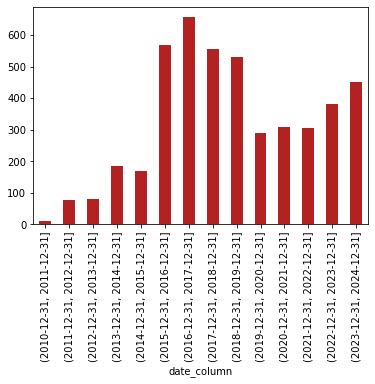

In [17]:
(df_bike.groupby(pd.cut(df_bike['date_column'], 
                  pd.date_range('2010-01-01', '2025-10-20', freq='1Y'))).count()['date_column']).plot(kind='bar', color='firebrick', rot=90)

<AxesSubplot:xlabel='date_column'>

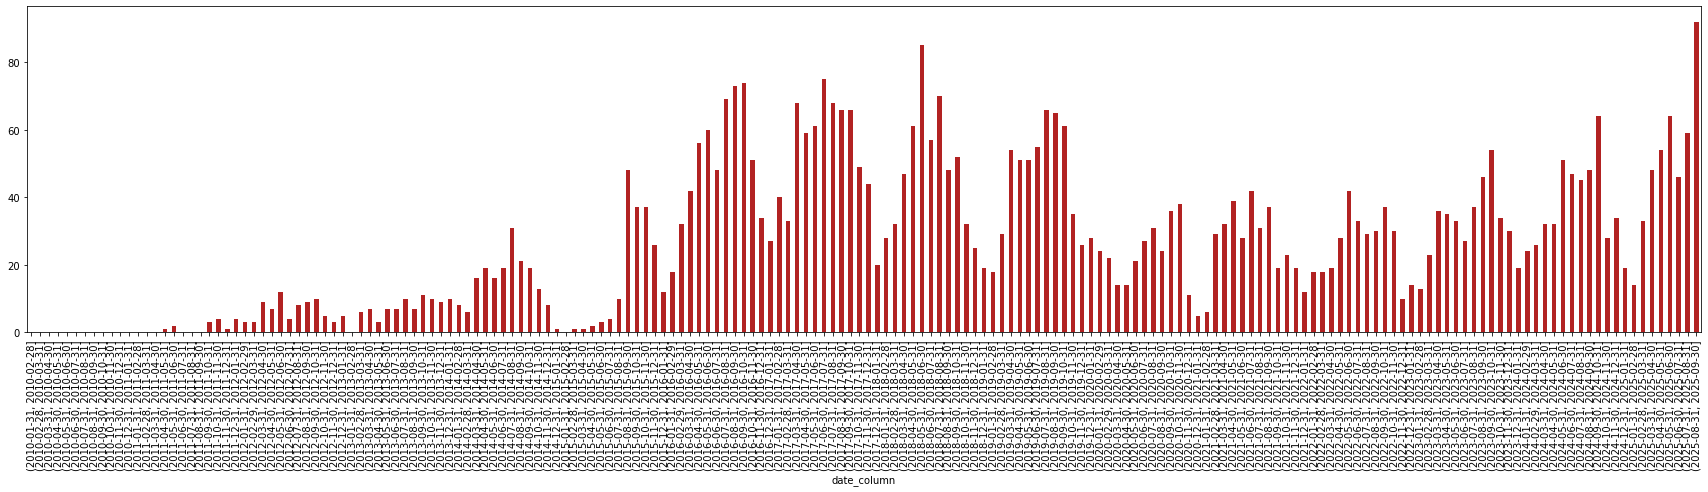

In [18]:
plt.figure(figsize=(30, 6)) 
(df_bike.groupby(pd.cut(df_bike['date_column'], 
                  pd.date_range('2010-01-01', '2025-10-20', freq='1M'))).count()['date_column']).plot(kind='bar', color='firebrick', rot=90)

In [6]:
start_date = '2010-10-20'
end_date = '2025-10-20'
recent_df = df_bike[(df_bike['date_column'] >= start_date) & (df_bike['date_column'] <= end_date)]
recent_df

,Unnamed: 0,X,Y,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,...,BLOCKKEY,SUBBLOCKKEY,CORRIDORID,NEARESTINTKEY,MAJORINJURIESOTHER,MINORINJURIESOTHER,UNKNOWNINJURIESOTHER,FATALOTHER,OBJECTID,date_column
0,797,-8.574897e+06,4.708167e+06,23985330,12060521,2012/05/04 10:28:00+00,11057852,1740.48,1.26,12913.0,...,0763965ce77d9e2e74bb74fe9eda952a,0763965ce77d9e2e74bb74fe9eda952a,11057852_2,310d24ffe7fb95e13481d733ff2e387b,NaN,NaN,NaN,NaN,398453191,2012-05-04 10:28:00+00:00
1,826,-8.575452e+06,4.707550e+06,23962926,11164839,2011/11/09 05:00:00+00,11001502,1460.99,0.00,7180.0,...,a0cb2b50563dec5cf3144088008c8f9c,e3432174f207e4a55946d264918d3835,12054472_2,5999548982c6caea51a926e8d2d45d7a,NaN,NaN,NaN,NaN,398453220,2011-11-09 05:00:00+00:00
2,863,-8.574910e+06,4.712549e+06,23950462,12046793,2012/04/06 12:59:00+00,11001302,4411.76,0.59,1562.0,...,071c70f7960690181b8f2b342bae46ae,6eeb765f9d7ab2439116159ac2769440,11001302_2,5c7b7887dad0bb26baf4627ef0b78d01,NaN,NaN,NaN,NaN,398453257,2012-04-06 12:59:00+00:00
3,1023,-8.574270e+06,4.708395e+06,24004749,12014404,2012/01/30 00:00:00+00,11063182,1250.67,0.16,7719.0,...,1892bfe4ffce6a3d6a8b017e63eeba05,8569fe7902405f35d32ba60631ee7cfc,11063182_1,12381b95b91bf587b88bfab3392ac9f2,NaN,NaN,NaN,NaN,398453417,2012-01-30 00:00:00+00:00
4,1043,-8.579157e+06,4.710900e+06,24066694,12089083,2012/06/27 04:00:00+00,11059602,5578.49,0.03,5787.0,...,ade938f45d032b80c63f51092b735a08,7385e575bafe75a89b452aa225435014,11059602_5,f3c9dbd3fe2f2a146cfb2b640b9546a5,NaN,NaN,NaN,NaN,398453437,2012-06-27 04:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5043,338157,-8.577033e+06,4.709004e+06,66781477267,25158602,2025/10/18 05:58:00+00,11059602,3376.08,48.06,NaN,...,99c4a74f5d3e546aa3f2154888a3c043,e3c66f122056b4954af64f9b2e9bab05,11059602_4,937ae69e3cb072d0145f9e3f49f7a826,0.0,0.0,0.0,0.0,398790551,2025-10-18 05:58:00+00:00
5044,338168,-8.574494e+06,4.709817e+06,66783341759,25158810,2025/10/18 18:59:00+00,11001002,2524.72,25.96,NaN,...,5e1dd81ecf76fc98a76d079dcf83e5f7,78edc316b2559bbda65092160de53343,11001002_4,f3292e567c431abdcaf382ec5bfe480b,0.0,0.0,0.0,0.0,398790562,2025-10-18 18:59:00+00:00
5045,338207,-8.571040e+06,4.707871e+06,66751529117,25157863,2025/10/16 20:10:00+00,12000802,1529.38,19.62,NaN,...,670a1fcc4ecdd5e6fc4880d03ceed114,670a1fcc4ecdd5e6fc4880d03ceed114,12000802_1,7a9d428ad79633cc21b7415597784e66,0.0,0.0,0.0,0.0,398790601,2025-10-16 20:10:00+00:00
5046,338223,-8.570615e+06,4.702151e+06,66756674497,25157849,2025/10/16 20:40:00+00,13023142,153.52,13.06,NaN,...,d0e6fdf4125257725d4d186a6fa1ba7d,6115c1598ee8818b3f7ba210ea2a0c67,13023142_1,3ab0e1e02855fb561b1f38c0e811c3f7,0.0,0.0,0.0,0.0,398790617,2025-10-16 20:40:00+00:00


C:\Users\cle9a\AppData\Local\Temp\ipykernel_24748\1864309198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_df['month_num'] = recent_df['date_column'].dt.month


<AxesSubplot:>

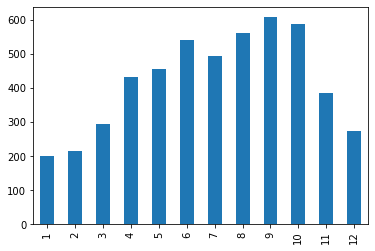

In [7]:
# Extract the month number
recent_df['month_num'] = recent_df['date_column'].dt.month

recent_df['month_num'].value_counts().sort_index().plot(kind = 'bar')

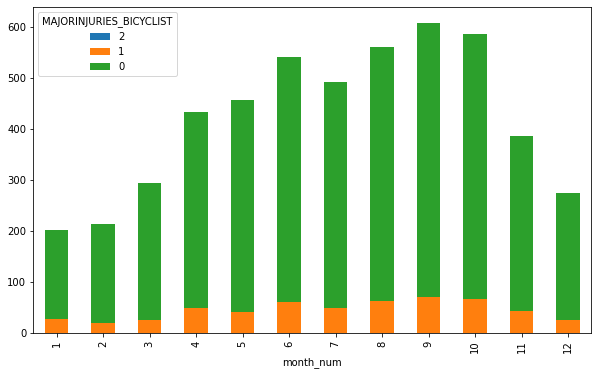

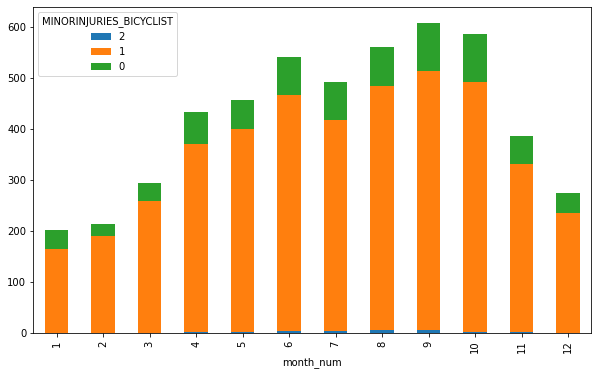

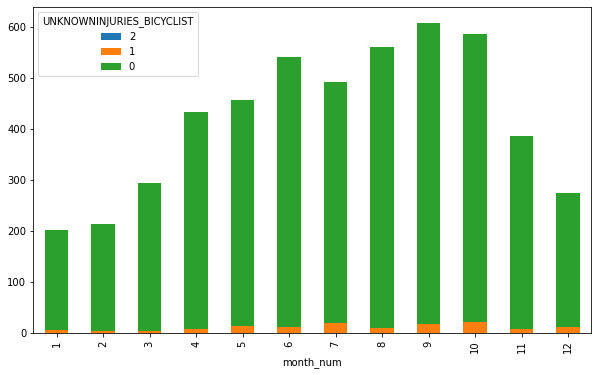

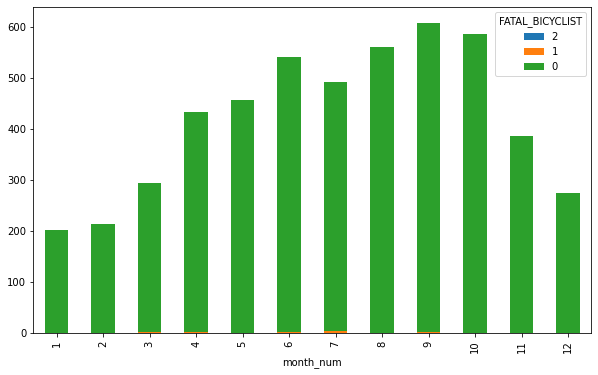

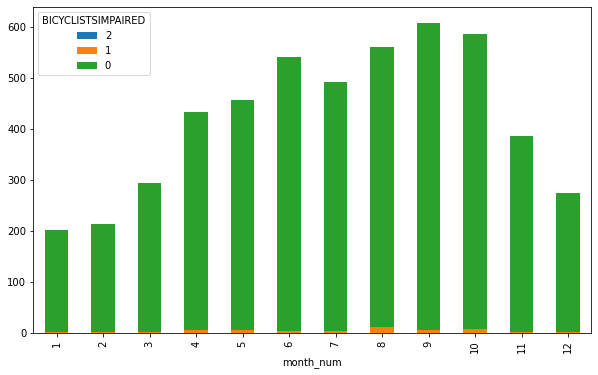

In [28]:
counts = recent_df.groupby('month_num')['MAJORINJURIES_BICYCLIST'].value_counts().unstack(fill_value=0).sort_index()
counts = counts.reindex(columns=[2,1,0])
counts.plot.bar(stacked=True, figsize=(10, 6)) 
plt.show()
counts = recent_df.groupby('month_num')['MINORINJURIES_BICYCLIST'].value_counts().unstack(fill_value=0).sort_index()
counts = counts.reindex(columns=[2,1,0])
counts.plot.bar(stacked=True, figsize=(10, 6)) 
plt.show()
counts = recent_df.groupby('month_num')['UNKNOWNINJURIES_BICYCLIST'].value_counts().unstack(fill_value=0).sort_index()
counts = counts.reindex(columns=[2,1,0])
counts.plot.bar(stacked=True, figsize=(10, 6)) 
plt.show()
counts = recent_df.groupby('month_num')['FATAL_BICYCLIST'].value_counts().unstack(fill_value=0).sort_index()
counts = counts.reindex(columns=[2,1,0])
counts.plot.bar(stacked=True, figsize=(10, 6)) 
plt.show()
counts = recent_df.groupby('month_num')['BICYCLISTSIMPAIRED'].value_counts().unstack(fill_value=0).sort_index()
counts = counts.reindex(columns=[2,1,0])
counts.plot.bar(stacked=True, figsize=(10, 6)) 
plt.show()

In [43]:
counts_unk = recent_df.groupby('month_num')['FATAL_BICYCLIST'].value_counts().unstack(fill_value=0).sort_index()
counts_unk

FATAL_BICYCLIST,0,1
month_num,,
1,200,1
2,214,0
3,290,3
4,431,2
5,456,0
6,537,3
7,488,4
8,560,1
9,605,3


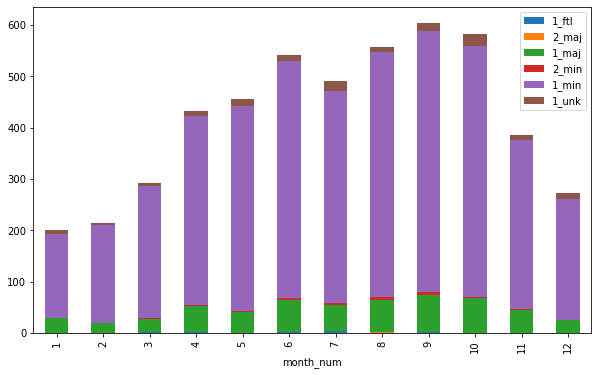

In [71]:
counts_maj = recent_df.groupby('month_num')['MAJORINJURIES_BICYCLIST'].value_counts().unstack(fill_value=0).sort_index()
counts_maj = counts_maj.reindex(columns=[2,1])

counts_min = recent_df.groupby('month_num')['MINORINJURIES_BICYCLIST'].value_counts().unstack(fill_value=0).sort_index()
counts_min = counts_min.reindex(columns=[2,1])

counts_unk = recent_df.groupby('month_num')['UNKNOWNINJURIES_BICYCLIST'].value_counts().unstack(fill_value=0).sort_index()
counts_unk = counts_unk.reindex(columns=[1])

counts_ftl = recent_df.groupby('month_num')['FATAL_BICYCLIST'].value_counts().unstack(fill_value=0).sort_index()
counts_ftl = counts_ftl.reindex(columns=[1])

merged_inner = pd.merge(counts_maj, counts_min, on='month_num', how='inner', suffixes = ['_maj', '_min'])
merged_inner = pd.merge(merged_inner, counts_unk, on='month_num', how='inner')
merged_inner = pd.merge(merged_inner, counts_ftl, on='month_num', how='inner', suffixes = ['_unk', '_ftl'])
merged_inner = merged_inner.reindex(columns=['1_ftl', '2_maj', '1_maj', '2_min', '1_min', '1_unk'])

merged_inner.plot.bar(stacked=True, figsize=(10, 6)) 
plt.show()

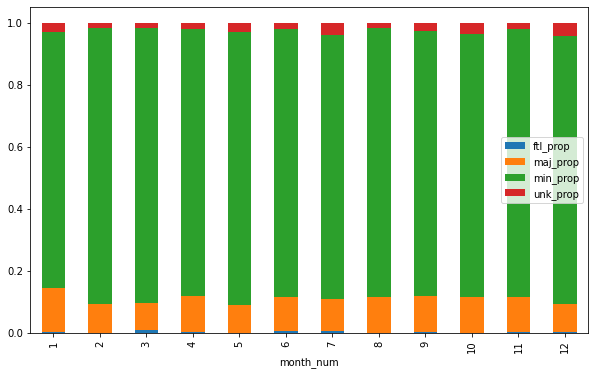

In [72]:
merged_inner['maj'] = merged_inner['2_maj']*2 + merged_inner['1_maj']
merged_inner['min'] = merged_inner['2_min']*2 + merged_inner['1_min']
#merged_inner = merged_inner.drop(columns = ['2_maj', '1_maj', '2_min', '1_min'])
merged_inner['total'] = merged_inner['1_ftl'] + merged_inner['1_unk'] + merged_inner['maj'] + merged_inner['min']
merged_inner['ftl_prop'] = merged_inner['1_ftl']/merged_inner['total']
merged_inner['maj_prop'] = merged_inner['maj']/merged_inner['total']
merged_inner['min_prop'] = merged_inner['min']/merged_inner['total']
merged_inner['unk_prop'] = merged_inner['1_unk']/merged_inner['total']
merged_inner = merged_inner.drop(columns = ['2_maj', '1_maj', '2_min', '1_min', '1_ftl', '1_unk', 'maj', 'min', 'total'])
merged_inner.plot.bar(stacked=True, figsize=(10, 6)) 
plt.show()

C:\Users\cle9a\AppData\Local\Temp\ipykernel_24748\2824307006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_df['hour_num'] = recent_df['date_column'].dt.hour


<AxesSubplot:>

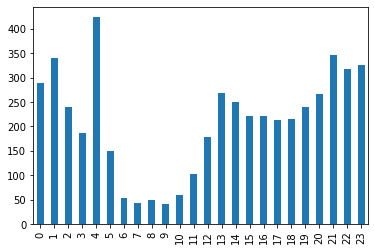

In [8]:
# Extract the month number
recent_df['hour_num'] = recent_df['date_column'].dt.hour

recent_df['hour_num'].value_counts().sort_index().plot(kind = 'bar')

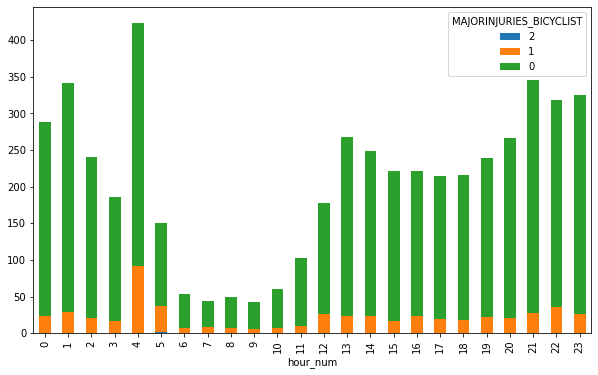

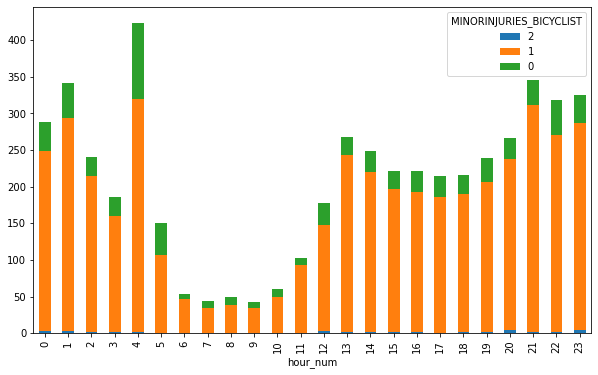

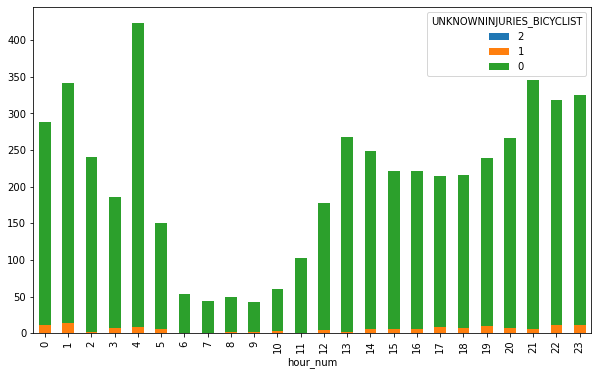

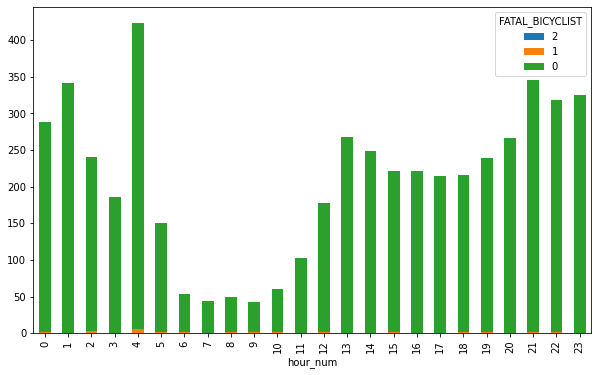

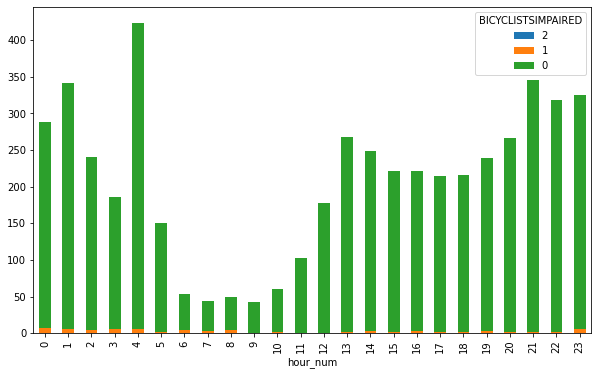

In [27]:
counts = recent_df.groupby('hour_num')['MAJORINJURIES_BICYCLIST'].value_counts().unstack(fill_value=0).sort_index()
counts = counts.reindex(columns=[2,1,0])
counts.plot.bar(stacked=True, figsize=(10, 6)) 
plt.show()
counts = recent_df.groupby('hour_num')['MINORINJURIES_BICYCLIST'].value_counts().unstack(fill_value=0).sort_index()
counts = counts.reindex(columns=[2,1,0])
counts.plot.bar(stacked=True, figsize=(10, 6)) 
plt.show()
counts = recent_df.groupby('hour_num')['UNKNOWNINJURIES_BICYCLIST'].value_counts().unstack(fill_value=0).sort_index()
counts = counts.reindex(columns=[2,1,0])
counts.plot.bar(stacked=True, figsize=(10, 6)) 
plt.show()
counts = recent_df.groupby('hour_num')['FATAL_BICYCLIST'].value_counts().unstack(fill_value=0).sort_index()
counts = counts.reindex(columns=[2,1,0])
counts.plot.bar(stacked=True, figsize=(10, 6)) 
plt.show()
counts = recent_df.groupby('hour_num')['BICYCLISTSIMPAIRED'].value_counts().unstack(fill_value=0).sort_index()
counts = counts.reindex(columns=[2,1,0])
counts.plot.bar(stacked=True, figsize=(10, 6)) 
plt.show()

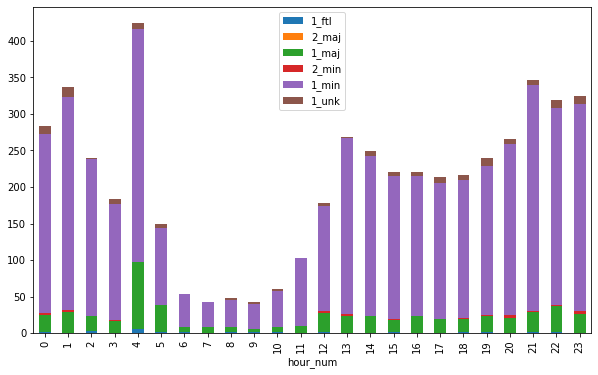

In [69]:
counts_maj = recent_df.groupby('hour_num')['MAJORINJURIES_BICYCLIST'].value_counts().unstack(fill_value=0).sort_index()
counts_maj = counts_maj.reindex(columns=[2,1])

counts_min = recent_df.groupby('hour_num')['MINORINJURIES_BICYCLIST'].value_counts().unstack(fill_value=0).sort_index()
counts_min = counts_min.reindex(columns=[2,1])

counts_unk = recent_df.groupby('hour_num')['UNKNOWNINJURIES_BICYCLIST'].value_counts().unstack(fill_value=0).sort_index()
counts_unk = counts_unk.reindex(columns=[1])

counts_ftl = recent_df.groupby('hour_num')['FATAL_BICYCLIST'].value_counts().unstack(fill_value=0).sort_index()
counts_ftl = counts_ftl.reindex(columns=[1])

merged_inner = pd.merge(counts_maj, counts_min, on='hour_num', how='inner', suffixes = ['_maj', '_min'])
merged_inner = pd.merge(merged_inner, counts_unk, on='hour_num', how='inner')
merged_inner = pd.merge(merged_inner, counts_ftl, on='hour_num', how='inner', suffixes = ['_unk', '_ftl'])
merged_inner = merged_inner.reindex(columns=['1_ftl', '2_maj', '1_maj', '2_min', '1_min', '1_unk'])

merged_inner.plot.bar(stacked=True, figsize=(10, 6)) 
plt.show()

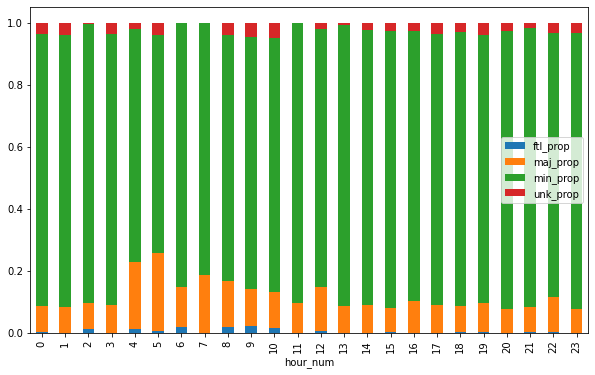

In [70]:
merged_inner['maj'] = merged_inner['2_maj']*2 + merged_inner['1_maj']
merged_inner['min'] = merged_inner['2_min']*2 + merged_inner['1_min']
#merged_inner = merged_inner.drop(columns = ['2_maj', '1_maj', '2_min', '1_min'])
merged_inner['total'] = merged_inner['1_ftl'] + merged_inner['1_unk'] + merged_inner['maj'] + merged_inner['min']
merged_inner['ftl_prop'] = merged_inner['1_ftl']/merged_inner['total']
merged_inner['maj_prop'] = merged_inner['maj']/merged_inner['total']
merged_inner['min_prop'] = merged_inner['min']/merged_inner['total']
merged_inner['unk_prop'] = merged_inner['1_unk']/merged_inner['total']
merged_inner = merged_inner.drop(columns = ['2_maj', '1_maj', '2_min', '1_min', '1_ftl', '1_unk', 'maj', 'min', 'total'])
merged_inner.plot.bar(stacked=True, figsize=(10, 6)) 
plt.show()

In [22]:
recent_df[recent_df['hour_num'] == 4]

,X,Y,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,ROADWAYSEGID,...,CORRIDORID,NEARESTINTKEY,MAJORINJURIESOTHER,MINORINJURIESOTHER,UNKNOWNINJURIESOTHER,FATALOTHER,OBJECTID,date_column,month_num,hour_num
1043,-8.579157e+06,4.710900e+06,24066694,12089083,2012/06/27 04:00:00+00,11059602,5578.49,0.03,5787.0,5728.0,...,11059602_5,f3c9dbd3fe2f2a146cfb2b640b9546a5,NaN,NaN,NaN,NaN,398453437,2012-06-27 04:00:00+00:00,6,4
2854,-8.571664e+06,4.709972e+06,24152565,12114044,2012/08/13 04:00:00+00,12000402,2950.89,24.58,5056.0,19219.0,...,12000402_2,bec1a43a4fa3ce4a600e18e5fa1a2be4,NaN,NaN,NaN,NaN,398455248,2012-08-13 04:00:00+00:00,8,4
5029,-8.578852e+06,4.708904e+06,24235047,12137242,2012/09/28 04:00:00+00,11072862,4693.00,0.01,6084.0,6584.0,...,Blockkey Not Found on Corridor,a66f8e5a0225bea8948f5ee05221d1d8,NaN,NaN,NaN,NaN,398457423,2012-09-28 04:00:00+00:00,9,4
5481,-8.574261e+06,4.712172e+06,24246275,12141183,2012/10/05 04:00:00+00,11040042,1939.04,24.83,9126.0,2751.0,...,11040042_1,01c708cd6fbcd21e7f604a1e371021d9,NaN,NaN,NaN,NaN,398457875,2012-10-05 04:00:00+00:00,10,4
5667,-8.563920e+06,4.703930e+06,24258946,12144934,2012/10/13 04:00:00+00,Route not found,0.00,0.00,0.0,0.0,...,Unknown,Unknown,NaN,NaN,NaN,NaN,398458061,2012-10-13 04:00:00+00:00,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336819,-8.570827e+06,4.708752e+06,66097241760,25142290,2025/09/17 04:00:00+00,Route not found,0.00,0.00,NaN,NaN,...,Route not found,Route not found,0.0,0.0,0.0,0.0,398789213,2025-09-17 04:00:00+00:00,9,4
337006,-8.571940e+06,4.707718e+06,66149648105,25144247,2025/09/21 04:25:00+00,12050892,522.42,26.96,NaN,NaN,...,12050892_1,818cb9e9c20bae6a05710ba2c213799f,0.0,0.0,0.0,0.0,398789400,2025-09-21 04:25:00+00:00,9,4
337676,-8.571807e+06,4.707718e+06,66373138687,25151982,2025/10/05 04:00:00+00,12050892,625.56,29.67,NaN,NaN,...,12050892_1,589679a79768f2b8f165755751dbd922,0.0,0.0,0.0,0.0,398790070,2025-10-05 04:00:00+00:00,10,4
337935,-8.571991e+06,4.709188e+06,66614000677,25154684,2025/10/10 04:00:00+00,12000202,1741.97,22.46,NaN,NaN,...,12000202_3,afcdb2cf7253e1068aae33140d3f15ee,0.0,0.0,0.0,0.0,398790329,2025-10-10 04:00:00+00:00,10,4


In [23]:
column_stats = ['MAJORINJURIES_BICYCLIST',
       'MINORINJURIES_BICYCLIST', 'UNKNOWNINJURIES_BICYCLIST',
       'FATAL_BICYCLIST', 'MAJORINJURIES_DRIVER', 'MINORINJURIES_DRIVER',
       'UNKNOWNINJURIES_DRIVER', 'FATAL_DRIVER', 'MAJORINJURIES_PEDESTRIAN',
       'MINORINJURIES_PEDESTRIAN', 'UNKNOWNINJURIES_PEDESTRIAN',
       'FATAL_PEDESTRIAN', 'TOTAL_VEHICLES', 'TOTAL_BICYCLES',
       'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED', 'BICYCLISTSIMPAIRED',
       'DRIVERSIMPAIRED', 'TOTAL_TAXIS', 'TOTAL_GOVERNMENT',
       'SPEEDING_INVOLVED', 'OFFINTERSECTION', 'INTAPPROACHDIRECTION', 'LOCATIONERROR',
       'FATALPASSENGER', 'MAJORINJURIESPASSENGER', 'MINORINJURIESPASSENGER',
       'UNKNOWNINJURIESPASSENGER']
for c in column_stats:
    print(recent_df[c].value_counts())

0    4498
1     545
2       1
Name: MAJORINJURIES_BICYCLIST, dtype: int64
1    4293
0     719
2      32
Name: MINORINJURIES_BICYCLIST, dtype: int64
0    4905
1     139
Name: UNKNOWNINJURIES_BICYCLIST, dtype: int64
0    5024
1      20
Name: FATAL_BICYCLIST, dtype: int64
0    5017
1      27
Name: MAJORINJURIES_DRIVER, dtype: int64
0    5002
1      41
2       1
Name: MINORINJURIES_DRIVER, dtype: int64
0    4880
1     163
2       1
Name: UNKNOWNINJURIES_DRIVER, dtype: int64
0    5044
Name: FATAL_DRIVER, dtype: int64
0    5039
1       5
Name: MAJORINJURIES_PEDESTRIAN, dtype: int64
0    5005
1      37
2       2
Name: MINORINJURIES_PEDESTRIAN, dtype: int64
0    5043
1       1
Name: UNKNOWNINJURIES_PEDESTRIAN, dtype: int64
0    5042
1       2
Name: FATAL_PEDESTRIAN, dtype: int64
1    4175
2     812
0      26
3      25
4       3
5       2
7       1
Name: TOTAL_VEHICLES, dtype: int64
1    4942
2     102
Name: TOTAL_BICYCLES, dtype: int64
0    4973
1      67
2       2
3       2
Name: TOTAL_PEDEST

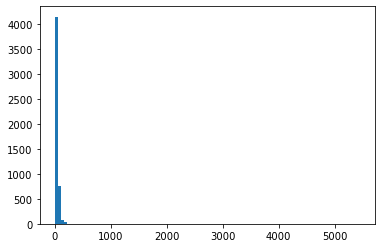

proportion included in graph: 0.9952418715305313


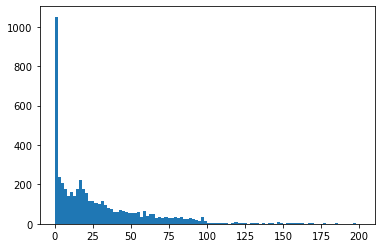

In [82]:
plt.hist(recent_df['OFFINTERSECTION'], bins = 100)
plt.show()
print('proportion included in graph: ' + str(sum(recent_df['OFFINTERSECTION']<= 200)/len(recent_df['OFFINTERSECTION'])))
plt.hist(recent_df['OFFINTERSECTION'], range = (0, 200), bins = 100)
plt.show()